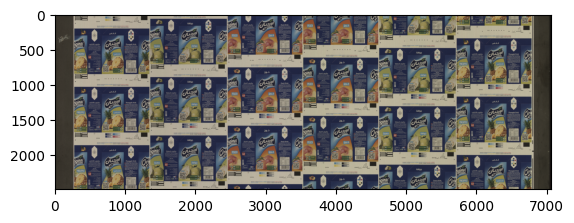

In [17]:
import os
from skimage import io
from matplotlib import pyplot as plt
path = '/Users/USER/Desktop/HACKATHON/data/Job1.bmp'
im = io.imread(os.path.join(path))

plt.imshow(im)

In [2]:
import fitz  # PyMuPDF
import os

def pdf_to_jpg(pdf_path, output_folder):
    pdf_document = fitz.open(pdf_path)
    
    for page_number in range(pdf_document.page_count):
        page = pdf_document[page_number]
        image = page.get_pixmap()
        
        jpg_filename = os.path.join(output_folder, f'page_{page_number + 1}.jpg')
        image.save(jpg_filename)
    
    pdf_document.close()

# Usage example
pdf_path = '/Users/USER/Desktop/HACKATHON/samples/SA-A067.pdf'  # Replace 'input.pdf' with the path to your PDF file
output_folder = '/Users/USER/Desktop/HACKATHON/samples_images'  # Output folder where JPG images will be saved
os.makedirs(output_folder, exist_ok=True)

pdf_to_jpg(pdf_path, output_folder)


In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# Load the image
image = cv2.imread('juice_box_image.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to convert the grayscale image to binary
thresh_value = threshold_otsu(gray_image)
binary_image = gray_image > thresh_value

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define regions to be removed based on contour area or other criteria
# For example, if you know the approximate dimensions of the regions to be removed
# you can filter contours based on their area.
# This step requires domain-specific knowledge about the size and position of the regions to be removed.
# Example: Remove contours with area less than a threshold
min_contour_area = 1000
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Create a mask for the regions to be removed
mask = np.zeros_like(binary_image)
cv2.drawContours(mask, filtered_contours, -1, 255, thickness=cv2.FILLED)

# Invert the mask (regions to be removed are white, others are black)
mask_inv = cv2.bitwise_not(mask)

# Apply the mask to the original image to remove the specified regions
result_image = cv2.bitwise_and(image, image, mask=mask_inv)